In [118]:
#import regular expressions
import re

#import pandas
import pandas as pd

# Import spacy
import spacy

# Install English language model
!spacy download nl_core_news_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     ----- ---------------------------------- 1.8/12.8 MB 5.3 MB/s eta 0:00:03
     ---------- ----------------------------- 3.4/12.8 MB 6.5 MB/s eta 0:00:02
     ----------------- ---------------------- 5.5/12.8 MB 7.3 MB/s eta 0:00:02
     ---------------------- ----------------- 7.1/12.8 MB 7.4 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 8.0 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 8.0 MB/s eta 0:00:01
     -------------------------------- ------- 10.5/12.8 MB 6.7 MB/s eta 0:00:01
     ----------------------------------- ---- 11.3/12.8 MB 6.1 MB/s eta 0:00:01
     ------------------------------------ --- 11.8/12.8 MB 6.1 MB/s eta 0:00:01
     ---------------------------------------  12.6/12.8 MB 5.5 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 MB 5.5

In [160]:
# Import graphing package
import plotly.express as px

In [119]:
with open("Data/ChatVriendinnetjes.txt", "r", encoding="utf-8") as f:
    chat = f.read()

In [120]:
print(chat)

18-01-2020 23:08 - Bente Morssinkhof: Aangezien ik Leon en Martijn (rima) nog nooit heb gezien en Eef cate nog nooit heeft gezien, doen we een diner met aanhang 🎉 en voor wie wil kunnen we op zoek naar een date 😏Kom je ook? Geef je beschikbaarheid op voor 'Datediner' - https://datumprikker.nl/pgxya7tmbjwr6i9t
18-01-2020 23:11 - Sanne Mak: Omg leuk! Ik kom alleen als Cait goed geschreven wordt
18-01-2020 23:14 - Didi Koenders: Leuk idee!
18-01-2020 23:28 - Bente Morssinkhof: HAHAHAHAHAHA oeps
18-01-2020 23:28 - Bente Morssinkhof: Ho
18-01-2020 23:28 - Bente Morssinkhof: Hahahahaha
19-01-2020 10:02 - Bente Morssinkhof: Hans, hoe voel je je vandaag?
19-01-2020 10:31 - Hanna Wollaars: Lief dat je het vraagt! Het gaat redelijk haha, heb wel veel pijn en alles kost me veel moeite en energie, maar ben lekker bij papa en mama en er wordt goed voor me gezorgd dus mag niet klagen!
19-01-2020 10:51 - Bente Morssinkhof: Geloof graag dat alles nu heel beurs is! Gelukkig lekker thuis, dat scheelt al

In [121]:
# 2. Regular expression to match each message line
pattern = re.compile(
    r"^(\d{2}-\d{2}-\d{4})\s+(\d{2}:\d{2})\s+-\s+(.*?):\s+(.*)",
    re.MULTILINE
)

# 3. Extract data
records = []

for date, time, person, message in pattern.findall(chat):
    records.append({
        "Person": person,
        "Date": date,
        "Time": time,
        "Message": message
    })

# 4. Create DataFrame
chat_df = pd.DataFrame(records)

chat_df.head()

,Person,Date,Time,Message
0,Bente Morssinkhof,18-01-2020,23:08,Aangezien ik Leon en Martijn (rima) nog nooit ...
1,Sanne Mak,18-01-2020,23:11,Omg leuk! Ik kom alleen als Cait goed geschrev...
2,Didi Koenders,18-01-2020,23:14,Leuk idee!
3,Bente Morssinkhof,18-01-2020,23:28,HAHAHAHAHAHA oeps
4,Bente Morssinkhof,18-01-2020,23:28,Ho


In [122]:
# Remove extra spaces from papers
chat_df['Message'] = chat_df['Message'].str.replace(r'\s+', ' ', regex=True).str.strip()
chat_df.head()

,Person,Date,Time,Message
0,Bente Morssinkhof,18-01-2020,23:08,Aangezien ik Leon en Martijn (rima) nog nooit ...
1,Sanne Mak,18-01-2020,23:11,Omg leuk! Ik kom alleen als Cait goed geschrev...
2,Didi Koenders,18-01-2020,23:14,Leuk idee!
3,Bente Morssinkhof,18-01-2020,23:28,HAHAHAHAHAHA oeps
4,Bente Morssinkhof,18-01-2020,23:28,Ho


In [123]:
# Load nlp pipeline
nlp = spacy.load('nl_core_news_sm')

# Check what functions it performs
print(nlp.pipe_names)

['tok2vec', 'morphologizer', 'tagger', 'parser', 'lemmatizer', 'attribute_ruler', 'ner']


In [124]:
# Define a function that runs the nlp pipeline on any given input text
def process_text(text):
    return nlp(text)

In [125]:
# Apply the function to the "Text" column, so that the nlp pipeline is called on each student essay
chat_df['Doc'] = chat_df['Message'].apply(process_text)

In [126]:
chat_df.head()

,Person,Date,Time,Message,Doc
0,Bente Morssinkhof,18-01-2020,23:08,Aangezien ik Leon en Martijn (rima) nog nooit ...,"(Aangezien, ik, Leon, en, Martijn, (, rima, ),..."
1,Sanne Mak,18-01-2020,23:11,Omg leuk! Ik kom alleen als Cait goed geschrev...,"(Omg, leuk, !, Ik, kom, alleen, als, Cait, goe..."
2,Didi Koenders,18-01-2020,23:14,Leuk idee!,"(Leuk, idee, !)"
3,Bente Morssinkhof,18-01-2020,23:28,HAHAHAHAHAHA oeps,"(HAHAHAHAHAHA, oeps)"
4,Bente Morssinkhof,18-01-2020,23:28,Ho,(Ho)


In [127]:
# Define a function to retrieve tokens from a doc object
def get_token(doc):
    return [(token.text) for token in doc]

In [128]:
# Run the token retrieval function on the doc objects in the dataframe
chat_df['Tokens'] = chat_df['Doc'].apply(get_token)
chat_df.head()

,Person,Date,Time,Message,Doc,Tokens
0,Bente Morssinkhof,18-01-2020,23:08,Aangezien ik Leon en Martijn (rima) nog nooit ...,"(Aangezien, ik, Leon, en, Martijn, (, rima, ),...","[Aangezien, ik, Leon, en, Martijn, (, rima, ),..."
1,Sanne Mak,18-01-2020,23:11,Omg leuk! Ik kom alleen als Cait goed geschrev...,"(Omg, leuk, !, Ik, kom, alleen, als, Cait, goe...","[Omg, leuk, !, Ik, kom, alleen, als, Cait, goe..."
2,Didi Koenders,18-01-2020,23:14,Leuk idee!,"(Leuk, idee, !)","[Leuk, idee, !]"
3,Bente Morssinkhof,18-01-2020,23:28,HAHAHAHAHAHA oeps,"(HAHAHAHAHAHA, oeps)","[HAHAHAHAHAHA, oeps]"
4,Bente Morssinkhof,18-01-2020,23:28,Ho,(Ho),[Ho]


In [129]:
# Define a function to retrieve lemmas from a doc object
def get_lemma(doc):
    return [(token.lemma_) for token in doc]

In [130]:
# Run the lemma retrieval function on the doc objects in the dataframe
chat_df['Lemmas'] = chat_df['Doc'].apply(get_lemma)

In [131]:
# Define a function to retrieve lemmas from a doc object
def get_pos(doc):
    #Return the coarse- and fine-grained part of speech text for each token in the doc
    return [(token.pos_, token.tag_) for token in doc]

In [132]:
# Define a function to retrieve parts of speech from a doc object
chat_df['POS'] = chat_df['Doc'].apply(get_pos)

In [133]:
chat_df.head()

,Person,Date,Time,Message,Doc,Tokens,Lemmas,POS
0,Bente Morssinkhof,18-01-2020,23:08,Aangezien ik Leon en Martijn (rima) nog nooit ...,"(Aangezien, ik, Leon, en, Martijn, (, rima, ),...","[Aangezien, ik, Leon, en, Martijn, (, rima, ),...","[aangezien, ik, Leon, en, Martijn, (, rima, ),...","[(SCONJ, VG|onder), (PRON, VNW|pers|pron|nomin..."
1,Sanne Mak,18-01-2020,23:11,Omg leuk! Ik kom alleen als Cait goed geschrev...,"(Omg, leuk, !, Ik, kom, alleen, als, Cait, goe...","[Omg, leuk, !, Ik, kom, alleen, als, Cait, goe...","[Omg, leuk, !, ik, komen, alleen, als, Cait, g...","[(PRON, N|soort|ev|basis|zijd|stan), (ADJ, ADJ..."
2,Didi Koenders,18-01-2020,23:14,Leuk idee!,"(Leuk, idee, !)","[Leuk, idee, !]","[leuk, idee, !]","[(ADJ, ADJ|prenom|basis|zonder), (NOUN, N|soor..."
3,Bente Morssinkhof,18-01-2020,23:28,HAHAHAHAHAHA oeps,"(HAHAHAHAHAHA, oeps)","[HAHAHAHAHAHA, oeps]","[HAHAHAHAHAHA, oeps]","[(PROPN, N|eigen|ev|basis|genus|stan), (VERB, ..."
4,Bente Morssinkhof,18-01-2020,23:28,Ho,(Ho),[Ho],[ho],"[(DET, TSW)]"


In [136]:
#Change index name and have it start from 1
chat_df.index = range(1, len(chat_df) + 1) 

chat_df.index.name = "Message_ID" 
chat_df = chat_df.reset_index().rename(columns={"index": "Message_ID"})


In [137]:
chat_df.head(10)

,Message_ID,Person,Date,Time,Message,Doc,Tokens,Lemmas,POS
0,1,Bente Morssinkhof,18-01-2020,23:08,Aangezien ik Leon en Martijn (rima) nog nooit ...,"(Aangezien, ik, Leon, en, Martijn, (, rima, ),...","[Aangezien, ik, Leon, en, Martijn, (, rima, ),...","[aangezien, ik, Leon, en, Martijn, (, rima, ),...","[(SCONJ, VG|onder), (PRON, VNW|pers|pron|nomin..."
1,2,Sanne Mak,18-01-2020,23:11,Omg leuk! Ik kom alleen als Cait goed geschrev...,"(Omg, leuk, !, Ik, kom, alleen, als, Cait, goe...","[Omg, leuk, !, Ik, kom, alleen, als, Cait, goe...","[Omg, leuk, !, ik, komen, alleen, als, Cait, g...","[(PRON, N|soort|ev|basis|zijd|stan), (ADJ, ADJ..."
2,3,Didi Koenders,18-01-2020,23:14,Leuk idee!,"(Leuk, idee, !)","[Leuk, idee, !]","[leuk, idee, !]","[(ADJ, ADJ|prenom|basis|zonder), (NOUN, N|soor..."
3,4,Bente Morssinkhof,18-01-2020,23:28,HAHAHAHAHAHA oeps,"(HAHAHAHAHAHA, oeps)","[HAHAHAHAHAHA, oeps]","[HAHAHAHAHAHA, oeps]","[(PROPN, N|eigen|ev|basis|genus|stan), (VERB, ..."
4,5,Bente Morssinkhof,18-01-2020,23:28,Ho,(Ho),[Ho],[ho],"[(DET, TSW)]"
5,6,Bente Morssinkhof,18-01-2020,23:28,Hahahahaha,(Hahahahaha),[Hahahahaha],[Hahahahaha],"[(PROPN, N|eigen|ev|basis|onz|stan)]"
6,7,Bente Morssinkhof,19-01-2020,10:02,"Hans, hoe voel je je vandaag?","(Hans, ,, hoe, voel, je, je, vandaag, ?)","[Hans, ,, hoe, voel, je, je, vandaag, ?]","[Hans, ,, hoe, voelen, je, je, vandaag, ?]","[(PROPN, N|eigen|ev|basis|zijd|stan), (PUNCT, ..."
7,8,Hanna Wollaars,19-01-2020,10:31,Lief dat je het vraagt! Het gaat redelijk haha...,"(Lief, dat, je, het, vraagt, !, Het, gaat, red...","[Lief, dat, je, het, vraagt, !, Het, gaat, red...","[lief, dat, je, het, vragen, !, het, gaan, red...","[(ADJ, ADJ|vrij|basis|zonder), (SCONJ, VG|onde..."
8,9,Bente Morssinkhof,19-01-2020,10:51,Geloof graag dat alles nu heel beurs is! Geluk...,"(Geloof, graag, dat, alles, nu, heel, beurs, i...","[Geloof, graag, dat, alles, nu, heel, beurs, i...","[Geloof, graag, dat, alles, nu, heel, beurs, z...","[(NOUN, N|soort|ev|basis|onz|stan), (ADV, BW),..."
9,10,Hanna Wollaars,19-01-2020,14:17,Ja precies!,"(Ja, precies, !)","[Ja, precies, !]","[ja, precies, !]","[(INTJ, TSW), (ADJ, ADJ|vrij|basis|zonder), (P..."


In [156]:
#Export dataset (use utf_8-sig for better encoding emoticons)
chat_df.to_csv("chat_data.csv", index=False, encoding="utf-8-sig")

# POS analysis

In [143]:
# Create new DataFrame for analysis purposes
chat_pos_df = chat_df[['Message_ID','Person', 'Doc']].copy()

# Create list to store results (optional)
num_list = []

# Define a function to extract POS counts from each Doc object
def get_pos_tags(doc):
    pos_counts = {}
    num_pos = doc.count_by(spacy.attrs.POS)
    
    for tag, count in sorted(num_pos.items()):
        pos_counts[doc.vocab[tag].text] = count
        
    num_list.append(pos_counts)   # optional: store in list
    return pos_counts             # IMPORTANT: return the dictionary!

# Apply function and store as new column
chat_pos_df['POS_counts'] = chat_pos_df['Doc'].apply(get_pos_tags)

chat_pos_df.head()

,Message_ID,Person,Doc,POS_counts
0,1,Bente Morssinkhof,"(Aangezien, ik, Leon, en, Martijn, (, rima, ),...","{'ADJ': 3, 'ADP': 6, 'ADV': 5, 'AUX': 2, 'CCON..."
1,2,Sanne Mak,"(Omg, leuk, !, Ik, kom, alleen, als, Cait, goe...","{'ADJ': 2, 'ADV': 1, 'AUX': 1, 'PRON': 2, 'PUN..."
2,3,Didi Koenders,"(Leuk, idee, !)","{'ADJ': 1, 'NOUN': 1, 'PUNCT': 1}"
3,4,Bente Morssinkhof,"(HAHAHAHAHAHA, oeps)","{'PROPN': 1, 'VERB': 1}"
4,5,Bente Morssinkhof,(Ho),{'DET': 1}


In [146]:
# Create new dataframe with part of speech counts
pos_counts = pd.DataFrame(num_list)
columns = list(pos_counts.columns)

# Add discipline of each paper as new column to dataframe
idx = 0
new_col = chat_pos_df['Person']
pos_counts.insert(loc=idx, column='Person', value=new_col)

pos_counts

,Person,ADJ,ADP,ADV,AUX,CCONJ,DET,NOUN,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X,INTJ,NUM,SPACE
0,Bente Morssinkhof,3.0,6.0,5.0,2.0,3.0,2.0,5.0,6.0,5.0,7.0,1.0,2.0,7.0,NaN,NaN,NaN,NaN
1,Sanne Mak,2.0,NaN,1.0,1.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN
2,Didi Koenders,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bente Morssinkhof,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,Bente Morssinkhof,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33717,Camille Werk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33718,Camille Werk,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
33719,Camille Werk,1.0,1.0,1.0,NaN,1.0,NaN,2.0,2.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
33720,Camille van Niekerk,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [154]:
# Get average part of speech counts used in papers of each discipline
average_pos_df = pos_counts.groupby(['Person']).mean()

# Round calculations to the nearest whole number
average_pos_df = average_pos_df.round(3)

# Reset index to improve DataFrame readability
average_pos_df = average_pos_df.reset_index()

average_pos_df = average_pos_df.drop(1)

# Reset index to improve DataFrame readability
average_pos_df = average_pos_df.reset_index()

average_pos_df = average_pos_df.drop(columns=["index"])

# Show dataframe
average_pos_df

,Person,ADJ,ADP,ADV,AUX,CCONJ,DET,NOUN,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X,INTJ,NUM,SPACE
0,Bente Morssinkhof,1.714,1.769,2.192,1.401,1.419,1.522,1.912,1.873,1.487,1.673,1.219,1.730,1.816,1.196,1.050,1.199,NaN
1,Camille van Niekerk,1.471,1.623,1.971,1.252,1.205,1.358,1.591,1.697,1.453,1.348,1.150,1.649,1.583,1.158,1.010,1.136,1.0
2,Didi Koenders,1.481,1.435,1.705,1.203,1.143,1.268,1.456,1.530,1.411,1.374,1.173,1.904,1.428,1.000,1.011,1.209,NaN
3,Emese Hof,1.678,1.668,2.429,1.367,1.423,1.384,1.783,1.758,1.544,2.066,1.151,1.575,1.701,1.208,1.045,1.214,NaN
4,Emma van Grinsven,1.869,2.098,2.388,1.561,1.456,1.761,2.111,2.463,1.669,2.048,1.343,1.615,1.981,1.188,1.107,1.290,NaN
5,Evelien te Molder,1.603,1.534,2.073,1.252,1.202,1.279,1.531,1.728,1.479,1.526,1.185,2.033,1.514,1.133,1.078,1.174,NaN
6,Hanna Wollaars,1.593,1.621,2.130,1.377,1.332,1.346,1.539,1.686,1.602,1.514,1.208,1.956,1.596,1.250,1.063,1.102,NaN
7,Maartje,1.444,1.573,1.914,1.325,1.213,1.335,1.522,1.797,1.451,1.574,1.164,1.499,1.555,1.337,1.045,1.183,NaN
8,Nicole van Riel,1.521,1.573,1.980,1.191,1.218,1.297,1.522,1.653,1.564,1.650,1.065,1.815,1.510,1.244,1.059,1.158,NaN
9,Rima Gebara,1.574,1.570,2.073,1.303,1.238,1.350,1.617,1.809,1.370,1.624,1.210,1.819,1.698,1.182,1.033,1.140,NaN


In [157]:
#Export dataset (use utf_8-sig for better encoding emoticons)
average_pos_df.to_csv("average_pos_data.csv", index=False, encoding="utf-8")

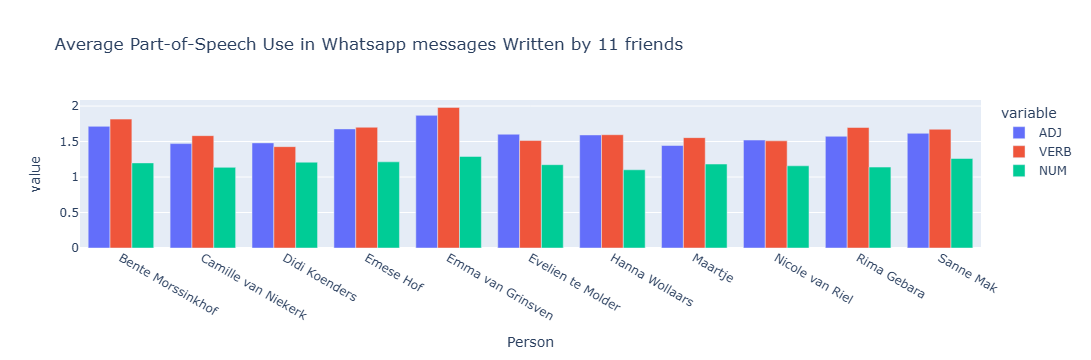

In [161]:
# Use plotly to plot proper noun use per genre
fig = px.bar(average_pos_df, x="Person", y=["ADJ", 'VERB', "NUM"], title="Average Part-of-Speech Use in Whatsapp messages Written by 11 friends", barmode='group')
fig.show()

'nl'